In [1]:
def transition_and_context(f,t):
    # f=from tuple, t=to tuple
    if len(f)!=len(t):
        raise ValueError('Tuples must be the same size.')
    f=sorted(list(f));
    t=sorted(list(t));
    def remove_common_item():
        for tt in t:
            for ff in f:
                if ff==tt:
                    f.remove(ff)
                    t.remove(ff)
                    return ff
        return []
    context=[];
    while 1:
        c=remove_common_item()
        if c==[]:
            return f[0],t[0],context
        else:
            context.append(c)
    end

In [2]:
def combinatorial_coefficient(f,t):
    # f=from tuple, t=to tuple
    ff,tt,context=transition_and_context(f,t)
    coeff=1
    for c in context:
        if c==ff:
            coeff=coeff+1;
    return coeff

In [3]:
def Cartesian_power(G, k, edge_labels='cannonical'):
    # Make Cartesian power G^k (unreduced)
    Gk=G
    for i in range(k-1):
        Gk = Gk.cartesian_product(G)
    # Make each vertex a tuple
    vflat=list(range(Gk.order()));
    for i in range(Gk.order()):
        v=Gk.vertices()[i]
        #print(i,v,flatten(v))
        vflat[i]=tuple(flatten(v))
    Gk.relabel(vflat)
    if edge_labels=='cannonical':
        Gk = add_edge_labels(Gk,edge_labels='cannonical')
    return Gk

In [4]:
def reduced_Cartesian_power(G, k, edge_labels='cannonical',prefix='',independent=false):
    Gk = Cartesian_power(G, k, edge_labels)
    for v in Gk.vertices():
        for u in Gk.vertices():
            sv=tuple(sorted(v))
            su=tuple(sorted(u))
            if v!=u and sv==su and v<u and Gk.has_vertex(v) and Gk.has_vertex(u):
                Gk.merge_vertices([v,u])
    if edge_labels=='induced':
        for e in Gk.edges():
            fr,to,context=transition_and_context(e[0],e[1])
            if prefix=='':
                Gk.set_edge_label(e[0],e[1],'(%s,%s)%s' %(fr,to,context))
            else:
                if independent:
                    Gk.set_edge_label(e[0],e[1],prefix+'%s%s' %(fr,to))
                else:
                    ctxt=''
                    for k in context:
                        if G.order() <= 9:
                            ctxt=ctxt+str(k)
                        else:
                            ctxt=ctxt+'_'+str(k)
                        Gk.set_edge_label(e[0],e[1],prefix+'%s%s_%s' %(fr,to,ctxt))
    return Gk

In [5]:
def add_edge_labels(G,edge_labels='default',prefix=''):
    if edge_labels=='default':
        if G.to_simple().size() <= 26:
            edge_labels=['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
        else:
            edge_labels=['e%s' %(i) for i in range(G.to_simple().size())]
    remaining_edge_labels=edge_labels
    for e in G.edges():
        if edge_labels=='cannonical':
            if G.order() <= 9:
                if prefix=='':
                    G.set_edge_label(e[0],e[1],'(%s,%s)' %(e[0],e[1]))
                else:
                    G.set_edge_label(e[0],e[1],'%s%s%s' %(prefix,e[0],e[1]))
            else:
                if prefix=='':
                    G.set_edge_label(e[0],e[1],'(%s,%s)' %(e[0],e[1]))
                else:
                    G.set_edge_label(e[0],e[1],'%s_%s_%s' %(prefix,e[0],e[1]))
        else:
            if G.is_directed():
                if e[0]<e[1]:
                    edge_label=remaining_edge_labels.pop(0)
                    G.set_edge_label(e[0],e[1],edge_label)
                    G.set_edge_label(e[1],e[0],edge_label+'bar')
            else:
                edge_label=remaining_edge_labels.pop(0)
                G.set_edge_label(e[0],e[1],edge_label)
    return G

In [6]:
def combinatorial_laplacian(G,combinatorial_coefficients=false):
    v=G.vertices()
    A = matrix(SR, G.order(), lambda i,j: G.edge_label(v[i],v[j]) if G.has_edge(v[i],v[j]) else 0)
    if combinatorial_coefficients:
        for i in range(G.order()):
            for j in range(G.order()):
                if G.has_edge(v[i],v[j]):
                    A[i,j]=combinatorial_coefficient(v[i],v[j])*A[i,j]
    D = diagonal_matrix(sum(A.transpose()))
    L=D-A
    return L

In [7]:
def tree_polynomial(G,combinatorial_coefficients=false):
    L=combinatorial_laplacian(G,combinatorial_coefficients)
    T=det(L[1:,1:]).expand()
    return T

In [8]:
def symmetric_directed(G):
    D = G.to_directed()
    for e in D.edges():
        if e[2]!=None and e[0]>e[1]:
            D.set_edge_label(e[0],e[1],e[2]+'bar')
    return D

/tmp/ipykernel_6590/1627231527.py:8: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in G.edges():


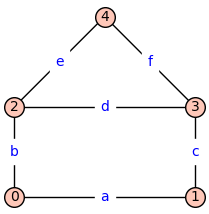

In [9]:
G = graphs.HouseGraph()
G = add_edge_labels(G)
G.show(figsize=3,edge_labels=true)

/tmp/ipykernel_6590/1627231527.py:8: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in G.edges():


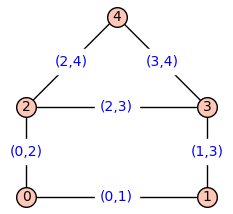

In [10]:
G = add_edge_labels(G,edge_labels='cannonical')
G.show(figsize=3,edge_labels=true)

/tmp/ipykernel_6590/1627231527.py:8: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in G.edges():


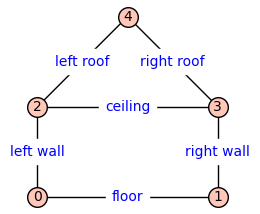

In [11]:
G = add_edge_labels(G,edge_labels=['floor','left wall','right wall','ceiling','left roof','right roof'])
G.show(figsize=3,edge_labels=true)

/tmp/ipykernel_6590/1627231527.py:8: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in G.edges():


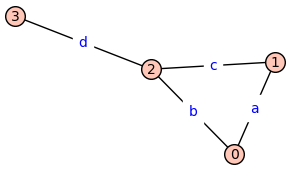

In [12]:
G = graphs.CycleGraph(3)
G.add_vertex()
G.add_edge(2,3)

G = add_edge_labels(G)
G.show(figsize=3,edge_labels=true,layout='spring')

In [13]:
L=combinatorial_laplacian(G); print(L)
print()
T=tree_polynomial(G); print(T)

/tmp/ipykernel_6590/2586761725.py:2: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=G.vertices()


[    a + b        -a        -b         0]
[       -a     a + c        -c         0]
[       -b        -c b + c + d        -d]
[        0         0        -d         d]

a*b*d + a*c*d + b*c*d


/tmp/ipykernel_6590/2586761725.py:2: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=G.vertices()


/tmp/ipykernel_6590/475901289.py:3: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in D.edges():


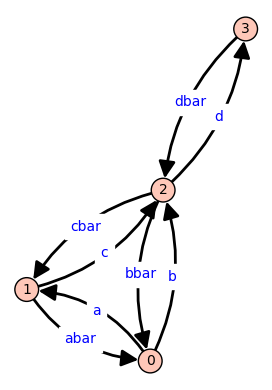

[          a + b              -a              -b               0]
[          -abar        abar + c              -c               0]
[          -bbar           -cbar bbar + cbar + d              -d]
[              0               0           -dbar            dbar]

abar*bbar*dbar + bbar*c*dbar + abar*cbar*dbar


/tmp/ipykernel_6590/2586761725.py:2: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=G.vertices()


In [14]:
D = symmetric_directed(G)
D.show(edge_labels=true,layout='spring')
print(combinatorial_laplacian(D))
print()
print(tree_polynomial(D))

/tmp/ipykernel_6590/475901289.py:3: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in D.edges():
/tmp/ipykernel_6590/1627231527.py:8: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in G.edges():


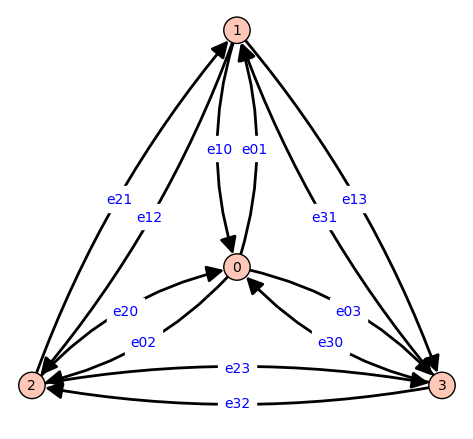

e10*e20*e30 + e12*e20*e30 + e13*e20*e30 + e10*e21*e30 + e13*e21*e30 + e10*e23*e30 + e12*e23*e30 + e13*e23*e30 + e10*e20*e31 + e12*e20*e31 + e10*e21*e31 + e10*e23*e31 + e10*e20*e32 + e12*e20*e32 + e13*e20*e32 + e10*e21*e32


/tmp/ipykernel_6590/2586761725.py:2: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=G.vertices()


In [15]:
G=graphs.WheelGraph(4)
D = symmetric_directed(G)
D = add_edge_labels(D,edge_labels='cannonical',prefix='e')
D.show(figsize=6,edge_labels=true)
print(tree_polynomial(D))

/tmp/ipykernel_6590/475901289.py:3: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in D.edges():
/tmp/ipykernel_6590/1627231527.py:8: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in G.edges():


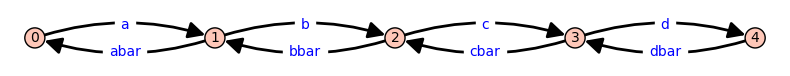

In [16]:
D = symmetric_directed(graphs.PathGraph(5))
D = add_edge_labels(D)
D.show(figsize=8,edge_labels=true)

/tmp/ipykernel_6590/2678086223.py:9: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=Gk.vertices()[i]
/tmp/ipykernel_6590/1627231527.py:8: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in G.edges():
/tmp/ipykernel_6590/995425967.py:3: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for v in Gk.vertices():
/tmp/ipykernel_6590/995425967.py:4: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for u in Gk.vertices():


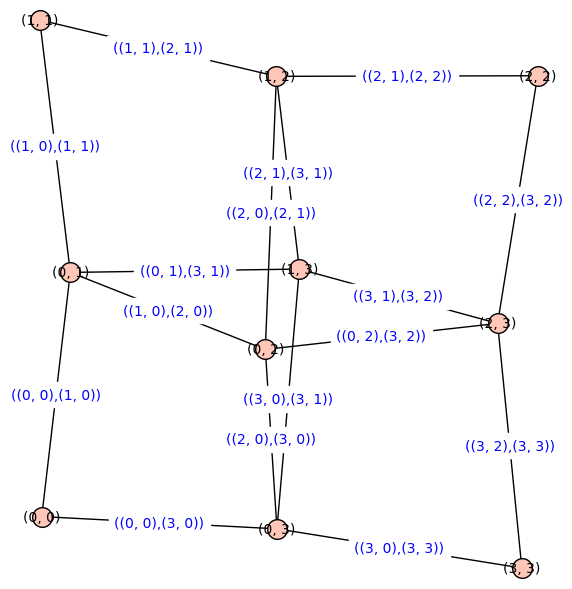

In [17]:
Gk=reduced_Cartesian_power(graphs.CycleGraph(4),2,edge_labels='cannonical')
Gk.show(figsize=8,edge_labels=true)

/tmp/ipykernel_6590/2678086223.py:9: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=Gk.vertices()[i]
/tmp/ipykernel_6590/995425967.py:3: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for v in Gk.vertices():
/tmp/ipykernel_6590/995425967.py:4: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for u in Gk.vertices():
/tmp/ipykernel_6590/995425967.py:10: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in Gk.edges():


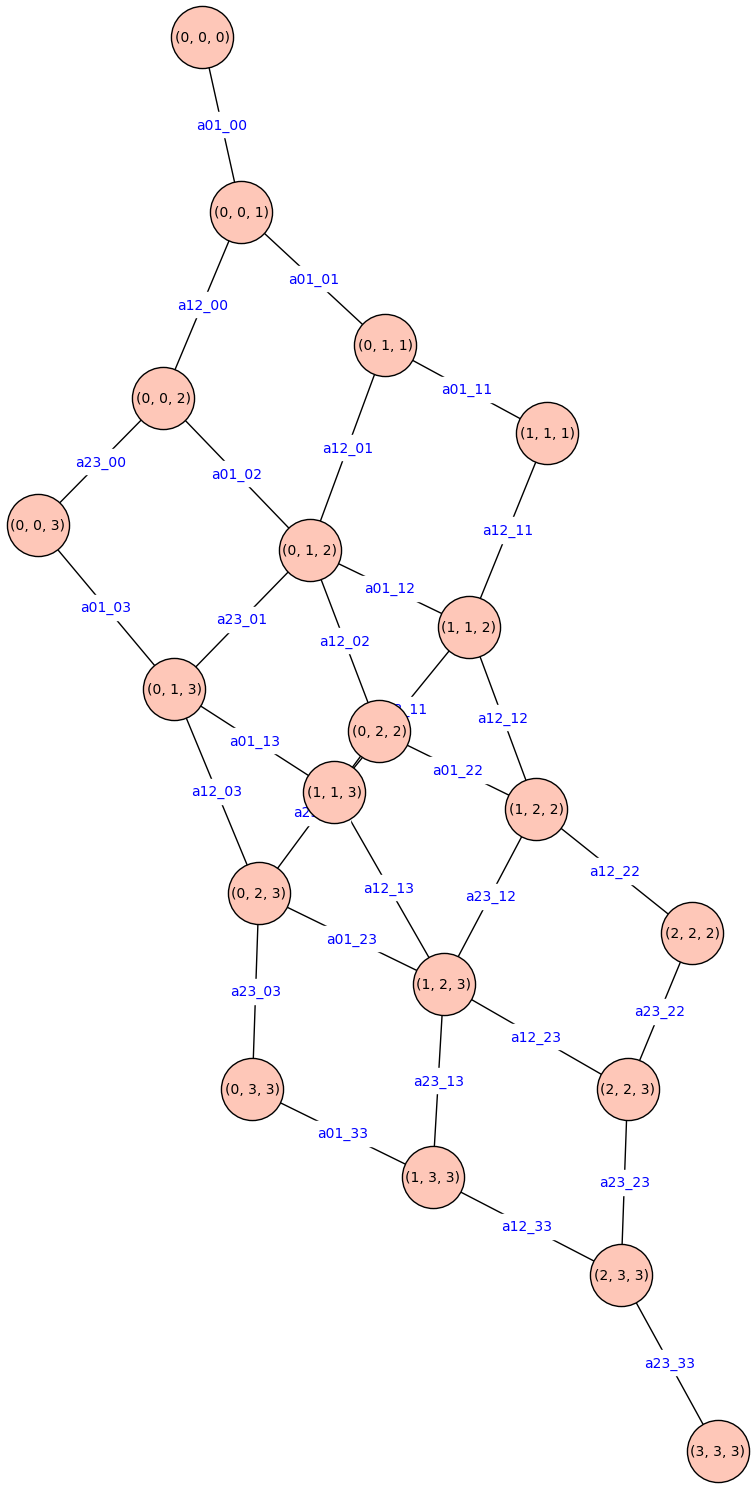

In [18]:
Gk=reduced_Cartesian_power(graphs.PathGraph(4),3,edge_labels='induced',prefix='a')
Gk.show(figsize=20,edge_labels=true,vertex_size=2000)

/tmp/ipykernel_6590/2678086223.py:9: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=Gk.vertices()[i]
/tmp/ipykernel_6590/995425967.py:3: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for v in Gk.vertices():
/tmp/ipykernel_6590/995425967.py:4: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for u in Gk.vertices():
/tmp/ipykernel_6590/995425967.py:10: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in Gk.edges():


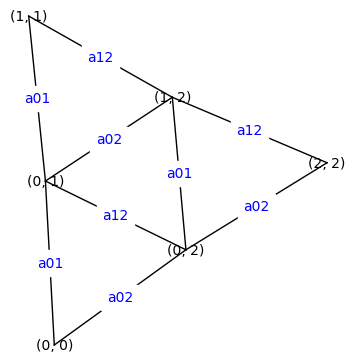

/tmp/ipykernel_6590/2586761725.py:2: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=G.vertices()


[        a01 + a02              -a01              -a02                 0                 0                 0]
[             -a01 2*a01 + a02 + a12              -a12              -a01              -a02                 0]
[             -a02              -a12 a01 + 2*a02 + a12                 0              -a01              -a02]
[                0              -a01                 0         a01 + a12              -a12                 0]
[                0              -a02              -a01              -a12 a01 + a02 + 2*a12              -a12]
[                0                 0              -a02                 0              -a12         a02 + a12]



2*a01^3*a02^2 + 2*a01^2*a02^3 + 4*a01^3*a02*a12 + 10*a01^2*a02^2*a12 + 4*a01*a02^3*a12 + 2*a01^3*a12^2 + 10*a01^2*a02*a12^2 + 10*a01*a02^2*a12^2 + 2*a02^3*a12^2 + 2*a01^2*a12^3 + 4*a01*a02*a12^3 + 2*a02^2*a12^3


2*(a01*a02 + a01*a12 + a02*a12)^2*(a01 + a02 + a12)

In [19]:
G=graphs.CycleGraph(3)
Gk=reduced_Cartesian_power(G,2,edge_labels='induced',prefix='a',independent=true)
Gk.show(figsize=5,edge_labels=true,vertex_size=0)
print(combinatorial_laplacian(Gk))
print()
Tk=tree_polynomial(Gk); print(Tk)
Tk.factor()

/tmp/ipykernel_6590/475901289.py:3: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in D.edges():
/tmp/ipykernel_6590/2678086223.py:9: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=Gk.vertices()[i]
/tmp/ipykernel_6590/995425967.py:3: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for v in Gk.vertices():
/tmp/ipykernel_6590/995425967.py:4: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for u in Gk.vertices():
/tmp/ipykernel_6590/995425967.py:10: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for de

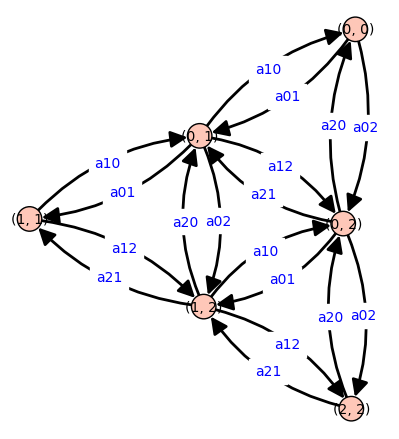

[        2*a01 + 2*a02                -2*a01                -2*a02                     0                     0                     0]
[                 -a10 a01 + a02 + a10 + a12                  -a12                  -a01                  -a02                     0]
[                 -a20                  -a21 a01 + a02 + a20 + a21                     0                  -a01                  -a02]
[                    0                -2*a10                     0         2*a10 + 2*a12                -2*a12                     0]
[                    0                  -a20                  -a10                  -a21 a10 + a12 + a20 + a21                  -a12]
[                    0                     0                -2*a20                     0                -2*a21         2*a20 + 2*a21]


/tmp/ipykernel_6590/2586761725.py:2: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=G.vertices()


4*(a10*a20 + a12*a20 + a10*a21)^2*(a01 + a02 + a10 + a12 + a20 + a21)

In [20]:
D = symmetric_directed(graphs.CycleGraph(3))
Dk=reduced_Cartesian_power(D,2,edge_labels='induced',prefix='a',independent=true)
Dk.show(figsize=6,edge_labels=true)
print(combinatorial_laplacian(Dk,combinatorial_coefficients=true))
Tk=tree_polynomial(Dk,combinatorial_coefficients=true)
Tk.factor()

/tmp/ipykernel_6590/2678086223.py:9: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=Gk.vertices()[i]


/tmp/ipykernel_6590/1627231527.py:8: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in G.edges():
/tmp/ipykernel_6590/995425967.py:3: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for v in Gk.vertices():
/tmp/ipykernel_6590/995425967.py:4: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for u in Gk.vertices():
/tmp/ipykernel_6590/1373098527.py:4: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in Gk.edges(): Gk.set_edge_label(e[Integer(0)], e[Integer(1)], Integer(0))


There are 1187343891269694642309198417406636743388000595418407837505224529723117873425106862080000000000000000000000000000 spanning trees.  Here is one:


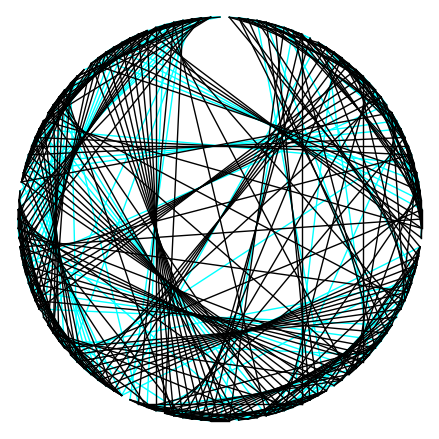

In [21]:
Gk=reduced_Cartesian_power(graphs.CubeGraph(4),2)
print('There are',Gk.spanning_trees_count(),'spanning trees.  Here is one:')
TGk=Gk.random_spanning_tree()
for e in Gk.edges(): Gk.set_edge_label(e[0], e[1], 0)
for e in TGk: Gk.set_edge_label(e[0], e[1], 1)
Gk.show(vertex_labels=false,vertex_size=0,figsize=6,edge_colors=Gk._color_by_label({0:'black',1:'cyan'}),layout='circular')

/tmp/ipykernel_6590/475901289.py:3: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in D.edges():
/tmp/ipykernel_6590/2678086223.py:9: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=Gk.vertices()[i]
/tmp/ipykernel_6590/995425967.py:3: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for v in Gk.vertices():
/tmp/ipykernel_6590/995425967.py:4: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for u in Gk.vertices():
/tmp/ipykernel_6590/995425967.py:10: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for de

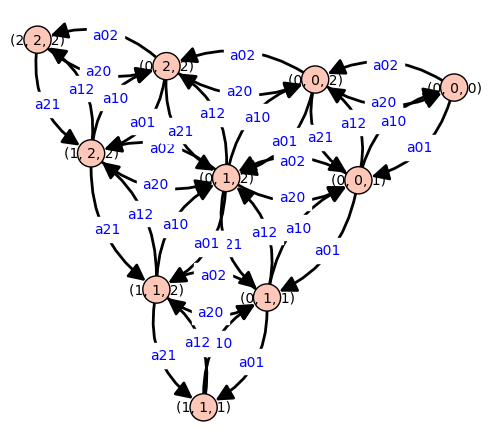

/tmp/ipykernel_6590/2586761725.py:2: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=G.vertices()


36*(2*a01^2 + 4*a01*a02 + 2*a02^2 + 4*a01*a10 + 5*a02*a10 + 2*a10^2 + 5*a01*a12 + 5*a02*a12 + 4*a10*a12 + 2*a12^2 + 5*a01*a20 + 4*a02*a20 + 5*a10*a20 + 5*a12*a20 + 2*a20^2 + 5*a01*a21 + 5*a02*a21 + 5*a10*a21 + 4*a12*a21 + 4*a20*a21 + 2*a21^2)*(a10*a20 + a12*a20 + a10*a21)^3*(a01 + a02 + a10 + a12 + a20 + a21)

In [22]:
D = symmetric_directed(graphs.CycleGraph(3))
Dk=reduced_Cartesian_power(D,3,edge_labels='induced',prefix='a',independent=true)
Dk.show(figsize=6,edge_labels=true)
Tk=tree_polynomial(Dk,combinatorial_coefficients=true)
Tk.factor()

/tmp/ipykernel_6590/475901289.py:3: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in D.edges():


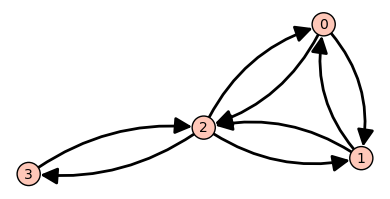

/tmp/ipykernel_6590/2678086223.py:9: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=Gk.vertices()[i]
/tmp/ipykernel_6590/995425967.py:3: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for v in Gk.vertices():
/tmp/ipykernel_6590/995425967.py:4: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for u in Gk.vertices():
/tmp/ipykernel_6590/995425967.py:10: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in Gk.edges():


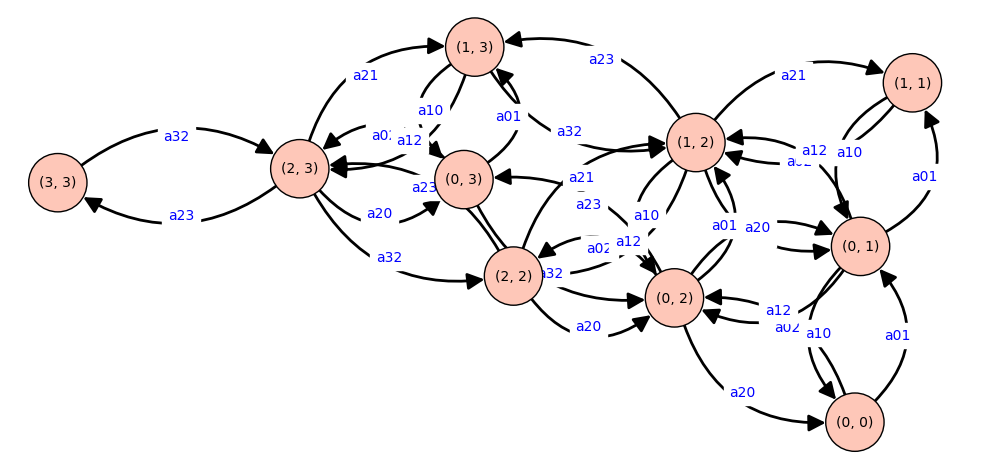

/tmp/ipykernel_6590/2586761725.py:2: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=G.vertices()


8*(a01*a02*a10 + a02^2*a10 + a02*a10^2 + a01^2*a12 + 2*a01*a02*a12 + a02^2*a12 + a01*a10*a12 + 2*a02*a10*a12 + a01*a12^2 + a02*a12^2 + a01^2*a20 + a01*a02*a20 + 2*a01*a10*a20 + 2*a02*a10*a20 + a10^2*a20 + 3*a01*a12*a20 + 2*a02*a12*a20 + 2*a10*a12*a20 + a12^2*a20 + a01*a20^2 + a10*a20^2 + a12*a20^2 + a01^2*a21 + 2*a01*a02*a21 + a02^2*a21 + 2*a01*a10*a21 + 3*a02*a10*a21 + a10^2*a21 + 2*a01*a12*a21 + 2*a02*a12*a21 + a10*a12*a21 + 2*a01*a20*a21 + a02*a20*a21 + 2*a10*a20*a21 + a12*a20*a21 + a01*a21^2 + a02*a21^2 + a10*a21^2 + a01^2*a23 + 2*a01*a02*a23 + a02^2*a23 + 2*a01*a10*a23 + 2*a02*a10*a23 + a10^2*a23 + 2*a01*a12*a23 + 2*a02*a12*a23 + 2*a10*a12*a23 + a12^2*a23 + 2*a01*a20*a23 + a02*a20*a23 + 2*a10*a20*a23 + 2*a12*a20*a23 + 2*a01*a21*a23 + 2*a02*a21*a23 + 2*a10*a21*a23 + a12*a21*a23 + a01*a23^2 + a02*a23^2 + a10*a23^2 + a12*a23^2 + a01^2*a32 + 2*a01*a02*a32 + a02^2*a32 + 2*a01*a10*a32 + 2*a02*a10*a32 + a10^2*a32 + 2*a01*a12*a32 + 2*a02*a12*a32 + 2*a10*a12*a32 + a12^2*a32 + 2*a01*a20*a32

In [23]:
G = graphs.CycleGraph(3)
G.add_vertex()
G.add_edge(2,3)
D = symmetric_directed(G)
D.show(edge_labels=true,layout='spring')
Dk=reduced_Cartesian_power(D,2,edge_labels='induced',prefix='a',independent=true)
Dk.show(figsize=10,edge_labels=true)
Tk=tree_polynomial(Dk,combinatorial_coefficients=true)
Tk.factor()

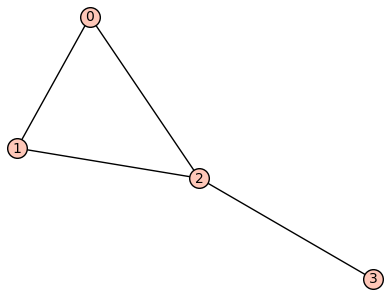

2*(3*a^2*b + 3*a*b^2 + 3*a^2*c + 9*a*b*c + 3*b^2*c + 3*a*c^2 + 3*b*c^2 + 4*a^2*d + 8*a*b*d + 3*b^2*d + 8*a*c*d + 7*b*c*d + 3*c^2*d + 4*a*d^2 + 3*b*d^2 + 3*c*d^2)*(a*b + a*c + b*c)^2*d^2


/tmp/ipykernel_6590/2678086223.py:9: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  v=Gk.vertices()[i]
/tmp/ipykernel_6590/995425967.py:3: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for v in Gk.vertices():
/tmp/ipykernel_6590/995425967.py:4: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for details.
  for u in Gk.vertices():
/tmp/ipykernel_6590/995425967.py:10: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/27408 for details.
  for e in Gk.edges():
/tmp/ipykernel_6590/2586761725.py:2: DeprecationWarning: parameter 'sort' will be set to False by default in the future
See https://github.com/sagemath/sage/issues/22349 for 

In [24]:
G=graphs.CycleGraph(3)
G.add_edge(2,3)
show(G)
var('a','b','c','d','e')
for k in range(2,3):
    Gk=reduced_Cartesian_power(G,k,edge_labels='induced',prefix='a',independent=true)
    Tk=tree_polynomial(Gk);
    Tk=Tk.subs(a01=a,a12=b,a23=d,a02=c)
    print(Tk.factor())